In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE

In [2]:
# Load the dataset
data = pd.read_csv( r'C:\Users\SUSHIL\Desktop\THE ALL PROJECTS\PROJECT NO. 1 - BANK LOAN PREDICTION\Bank_Personal_Loan_Modelling.csv')
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [3]:
print(data.head())

   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [6]:
data.shape

(5000, 14)

In [7]:
data.isnull().sum() # CHECKING THE MISSING VALUES.

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [9]:
experience = data['Experience']
age = data['Age']
correlation = age.corr(experience)
correlation

0.9942148569683317

This show the correlation between the columns

In [10]:
duplicate = data[data.duplicated()]
print("No. of duplicate rows: ",duplicate)

No. of duplicate rows:  Empty DataFrame
Columns: [ID, Age, Experience, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []


# EDA: Studying the data distribution

In [11]:
unique_no = data.nunique(axis = 0, dropna = True)
unique_no

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [12]:
#No. of people with zero mortgage

zero_mortgage = data.Mortgage[data.Mortgage == 0].count()
print("People with Zero Mortgage: ", zero_mortgage)

People with Zero Mortgage:  3462


In [13]:
#No. of people with zero credit card spending per month

zero_cc_spend = data.CreditCard[data.CreditCard == 0].count()
print("People with zero credit card spending per month: ",zero_cc_spend)

People with zero credit card spending per month:  3530


# Univariate and Bivariate analysis

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
import scipy.stats as stats
%matplotlib inline

<Axes: xlabel='Income'>

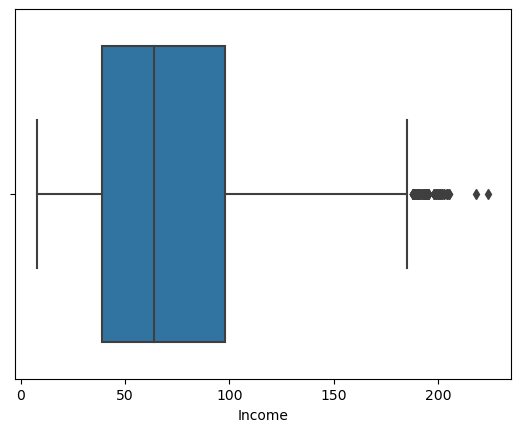

In [15]:
sns.boxplot(x=data['Income'])

<Axes: xlabel='Age'>

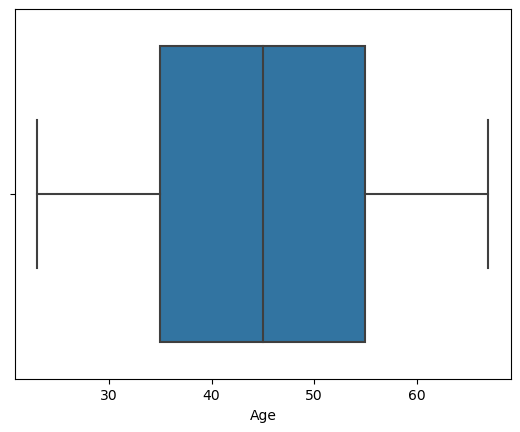

In [16]:
sns.boxplot(x=data['Age'])

<Axes: xlabel='CCAvg'>

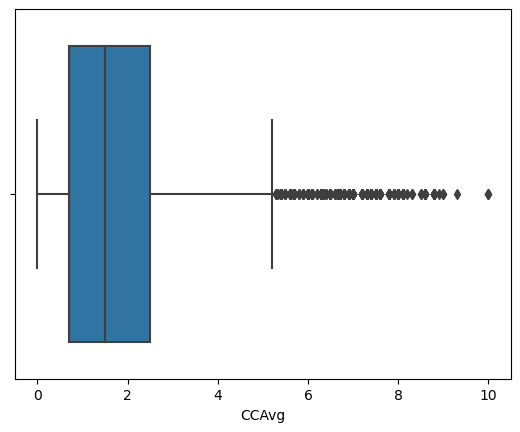

In [17]:
sns.boxplot(x=data['CCAvg'])

<Axes: xlabel='Mortgage'>

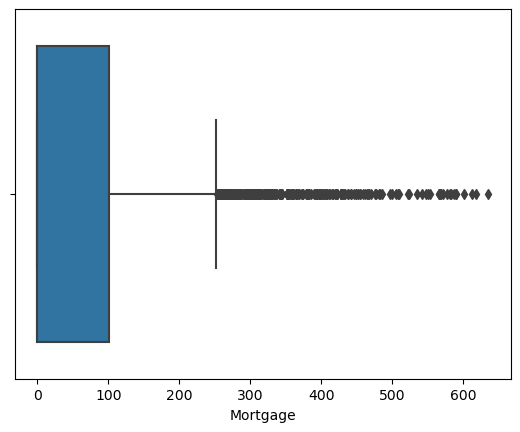

In [18]:
sns.boxplot(x=data['Mortgage'])

<Axes: xlabel='Personal Loan'>

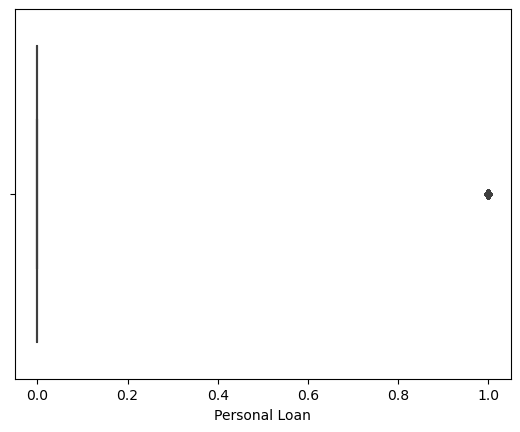

In [19]:
sns.boxplot(x=data['Personal Loan'])

<Axes: xlabel='Securities Account'>

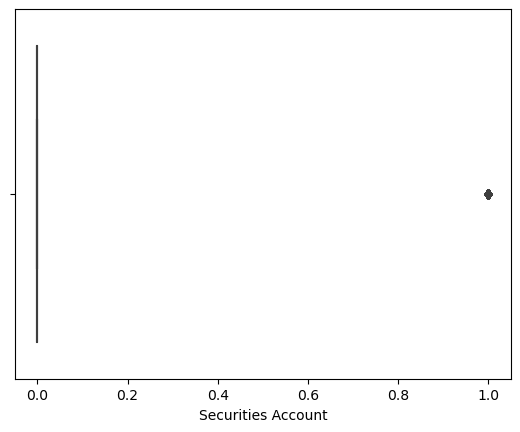

In [20]:
sns.boxplot(x=data['Securities Account'])

<Axes: xlabel='CD Account'>

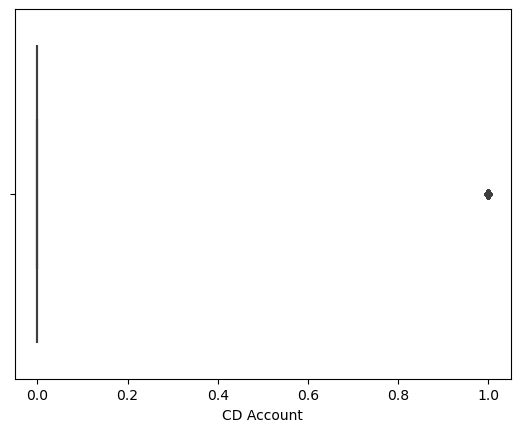

In [21]:
sns.boxplot(x=data['CD Account'])

we can remove outliers as its critical

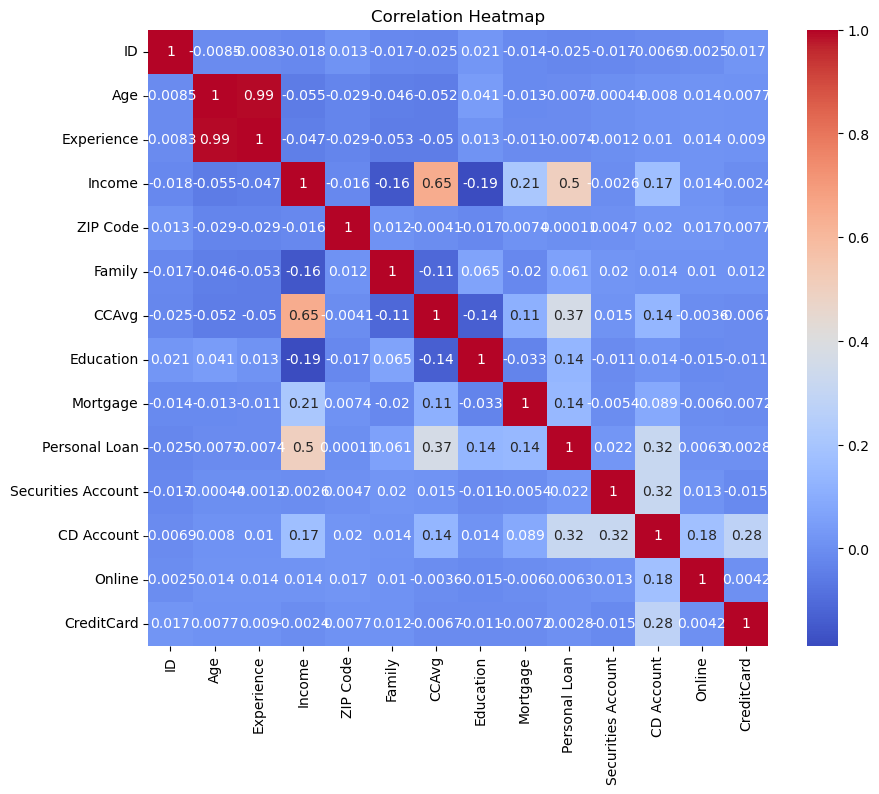

In [22]:
#Creating a relationships between numeric features by using Correlation Heatmap.
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Text(0.5, 0, 'Personal Loan')

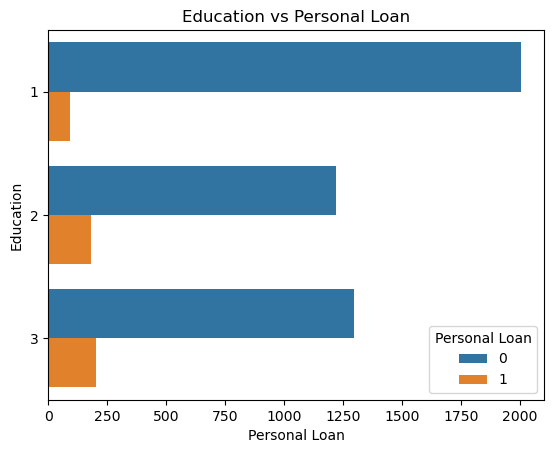

In [23]:
sns.countplot(y='Education', data = data , hue = 'Personal Loan')
plt.title('Education vs Personal Loan')
plt.ylabel('Education')
plt.xlabel('Personal Loan')

People with increasing education have availed personal loan.

Text(0.5, 0, 'Personal Loan')

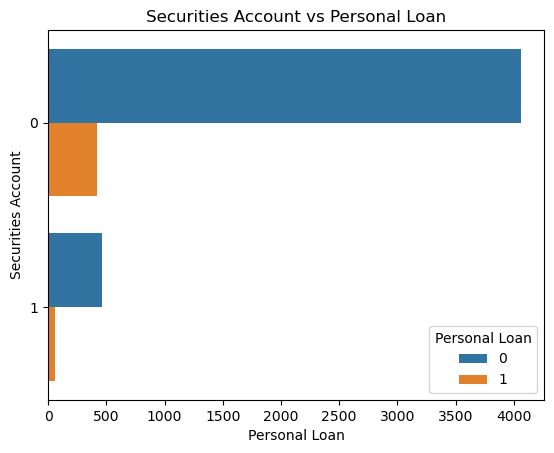

In [24]:
sns.countplot(y='Securities Account', data = data , hue = 'Personal Loan')
plt.title('Securities Account vs Personal Loan')
plt.ylabel('Securities Account')
plt.xlabel('Personal Loan')

Among people having Securities Account, a more fraction has availed Personal Loan than people having no Securities Account

Text(0.5, 0, 'Personal Loan')

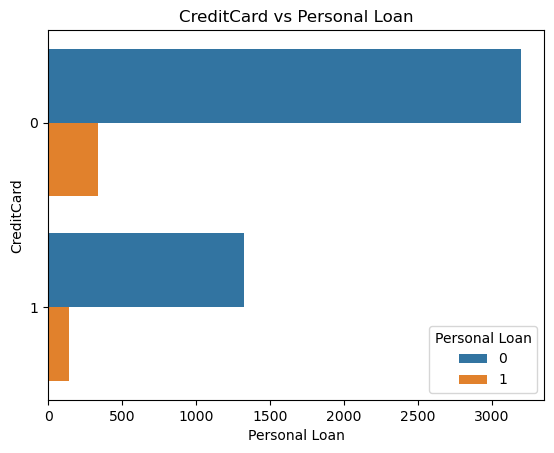

In [25]:
sns.countplot(y='CreditCard', data = data , hue = 'Personal Loan')
plt.title('CreditCard vs Personal Loan')
plt.ylabel('CreditCard')
plt.xlabel('Personal Loan')

Among people having credit card, a more fraction has availed Personal Loan than people having no credit card

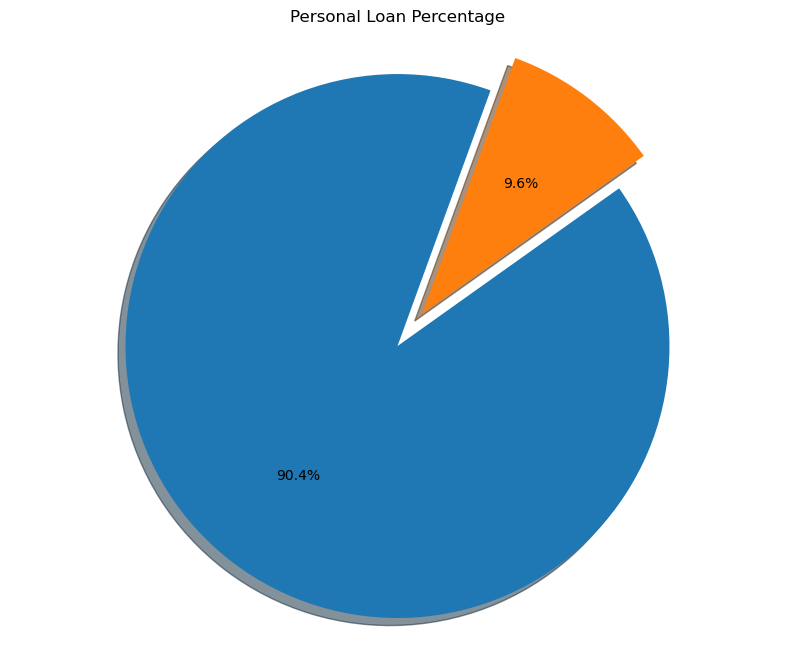

In [26]:
dframe=pd.DataFrame(data['Personal Loan'].value_counts()).reset_index()
dframe.columns=['Labels','Personal Loan']
fig1,ax1=plt.subplots(figsize=(10,8))
explode=(0,0.15)
ax1.pie(dframe['Personal Loan'],explode=explode,autopct='%1.1f%%',shadow=True,startangle=70)
ax1.axis('equal')
plt.title('Personal Loan Percentage')
plt.show()

In [27]:
#Applying necessary transformations for feature variables


X=data[['Age','Income','CCAvg','Education','Mortgage','Securities Account','Online',"CreditCard"]].values
y=data['Personal Loan'].values

In [28]:
X.shape

(5000, 8)

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [31]:
#Splitting the data into train and test set


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [32]:
print(X_train.shape)

(3500, 8)


# LOGISTIC REGRESSION

In [33]:
#Using Logistic Regression model to predict the likelihood of a customer buying personal loans


from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [34]:
y_predict = model.predict(X_test)
print(y_predict)

[0 0 0 ... 0 0 0]


In [35]:
y_predict_train = model.predict(X_train)
print(y_predict_train)

[0 0 0 ... 0 0 0]


C:\Users\SUSHIL\AppData\Local\Temp\ipykernel_29888\385971154.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-y_predict))


<Axes: ylabel='Density'>

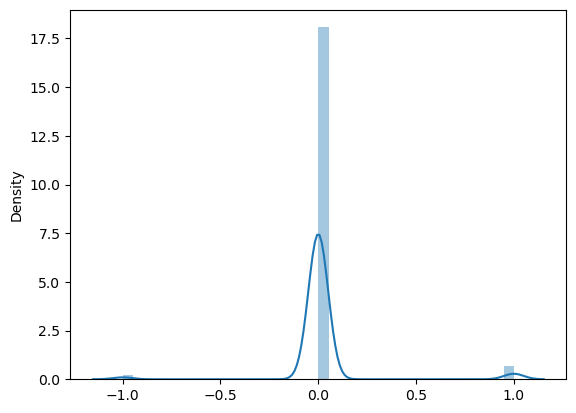

In [36]:
sns.distplot((y_test-y_predict))

In [37]:
#Metrics related for evaluating the model performance


from sklearn import metrics
print('TRAIN:\n')
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_train, y_predict_train))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_absolute_error(y_train,y_predict_train)))

TRAIN:

Mean Absolute Error:  0.06085714285714286
Root Mean Squared Error:  0.24669240534954223


In [38]:
print('TEST:\n')
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_absolute_error(y_test,y_predict)))

TEST:

Mean Absolute Error:  0.048666666666666664
Root Mean Squared Error:  0.2206052281036573


In [39]:
accuracy_train = metrics.accuracy_score(y_train,y_predict_train)
print('Train Accuracy: ',accuracy_train)
accuracy_test = metrics.accuracy_score(y_test,y_predict)
print('Test Accuracy: ',accuracy_test)

Train Accuracy:  0.9391428571428572
Test Accuracy:  0.9513333333333334


In [40]:
from sklearn.metrics import precision_recall_fscore_support
def plot_classification_report(y_tru, y_prd, figsize=(10, 5), ax=None):
    plt.figure(figsize=figsize)
    xticks = ['precision', 'recall', 'f1-score', 'support']
    yticks = ['Will not avail loan','Will avail loan']
    rep = np.array(precision_recall_fscore_support(y_tru, y_prd)).T
    sns.heatmap(rep,annot=True, cbar=False, xticklabels=xticks, yticklabels=yticks, ax=ax)

Classification Report for Logistic Regression:



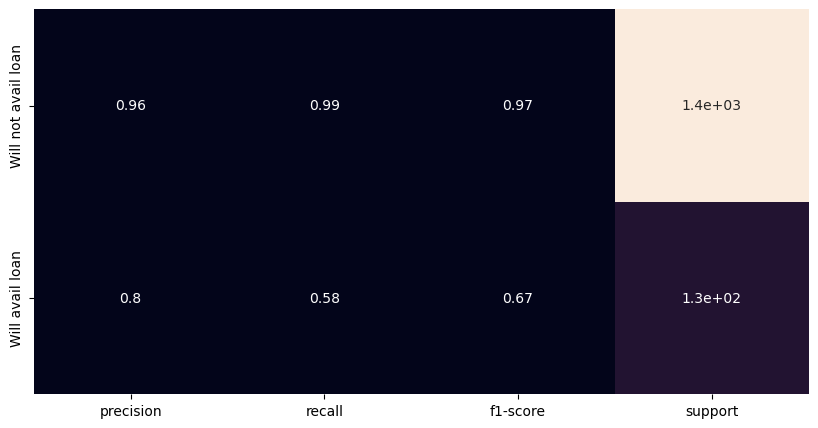

In [41]:
print('Classification Report for Logistic Regression:\n')
plot_classification_report(y_test,y_predict)

In [42]:
from sklearn.metrics import accuracy_score

Confusion Matrix for Logistic Regression



<Axes: >

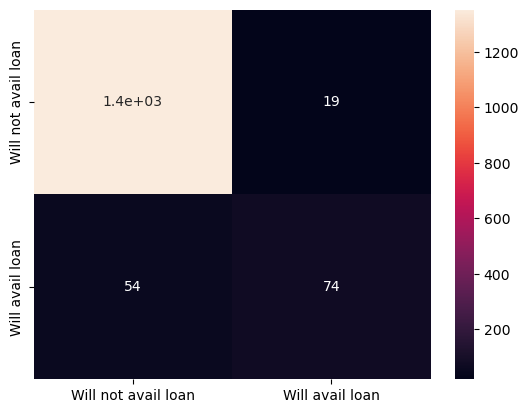

In [43]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix for Logistic Regression\n')
class_name = ['Will not avail loan', 'Will avail loan']
cf_matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(cf_matrix, annot = True, xticklabels = class_name, yticklabels = class_name)

In [44]:
acc=accuracy_score(y_test,y_predict)
print('accuracy of the model:',acc)

accuracy of the model: 0.9513333333333334


# SVM (SUPPORT VECTOR MACHINE)

In [45]:
from sklearn.svm import SVC
SVM = SVC(kernel = 'linear')
SVM.fit(X_train, y_train)

SVC(kernel='linear')

In [46]:
y_predict_SVM = SVM.predict(X_test)
print(y_predict_SVM)

[0 0 0 ... 0 0 0]


Confusion Matrix for Support Vector Machine



<Axes: >

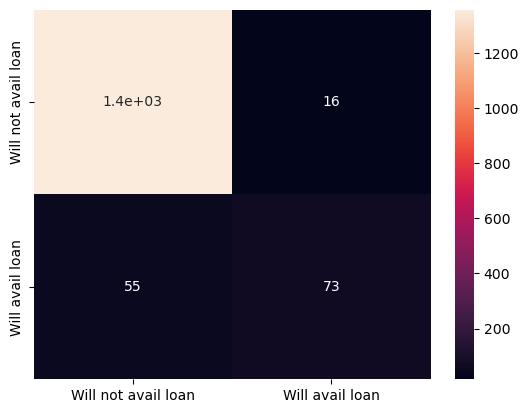

In [47]:
print('Confusion Matrix for Support Vector Machine\n')
cf_matrix = confusion_matrix(y_test, y_predict_SVM)
sns.heatmap(cf_matrix, annot = True, xticklabels = class_name, yticklabels = class_name)

Classification Report for Support Vector Machine:



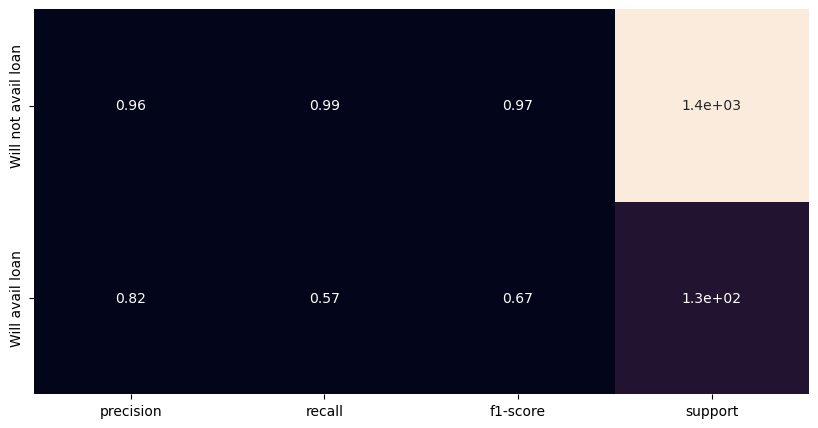

In [48]:
print('Classification Report for Support Vector Machine:\n')
plot_classification_report(y_test,y_predict_SVM)

In [49]:
acc=accuracy_score(y_test,y_predict_SVM)
print('accuracy of the model:',acc)

accuracy of the model: 0.9526666666666667


# HERE WE CHECK THE WHICH MODEL IS WITH THE HIGH ACCURACY

In [51]:
final_data = pd.DataFrame({'Models':['LR','SVM'],
                          'ACCURACY':[accuracy_score(y_test,y_predict),
                                     accuracy_score(y_test,y_predict_SVM)]})

In [52]:
final_data

,Models,ACCURACY
0,LR,0.951333
1,SVM,0.952667
